In [14]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import seaborn as sns

from lib.game_state import GameState
from lib.player.naive_player import NaivePlayer
from lib.words.simple_word_list import SimpleWordList
from lib.words.word_index import WordIndex
from lib.words.word_loader import WordLoader

In [38]:
def get_stats(runs):
    wordlen = 5
    word_list = WordLoader.load_wordlist()

    print('running games')
    guesses = []
    words = WordIndex(word_list)
    for i in range(runs):
        n_guesses = run_game(words, wordlen)
        guesses.append(n_guesses)
    return guesses

def run_game(words, wordlen=5):
    state = GameState(words.list)
    player = NaivePlayer(state, words=words)
    result = None
    while True:
        guess = player.guess(state, prev=result)
        result = state.update(guess)

        if guess == state.answer:
            return state.guesses
        else:
            player.update_state(result)

running games


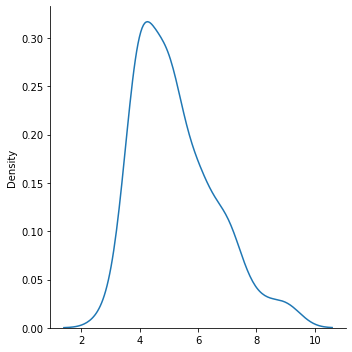

In [49]:
RUNS = 100

stats = get_stats(RUNS)

data_range = range(1, max(stats) + 1)

sns.displot(stats, kind="kde")